<p align="center"><strong><font size="6">Programming Assignement 1 - Group 69. Valentin Quoniam, Semir Sehic</font></strong></p>

Importing libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor



<p align="center"><font size="6">Task 1</font></p>

The selection of the Gradient Boosting classifier is based on its high accuracy score. All accuracy scores are displayed in step 3.
The Gradient Boosting classifier is an esemble learning algorithm used for classification tasks. The algorithm minimizes the residuals between predicted and actual values, through sequential refinement it achieves a high predictive accuracy.

Gradient Boosting classifier accuracy: 0.952

**Step 1 : Reading the data**

In [51]:
# If CTG.csv doesn't exist, download it.
if not os.path.exists('CTG.csv'):
    !wget https://www.cse.chalmers.se/~richajo/dit866/data/CTG.csv --no-check-certificate
    
data = pd.read_csv('CTG.csv', skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

# Safety verification of the data
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


**Step 2 : Training the baseline classifier**

In [52]:
scores = []
# Dummy Classifier
dummy_clf = DummyClassifier(strategy='most_frequent')
scores.append(np.mean(cross_val_score(dummy_clf, Xtrain, Ytrain)))

**Step 3 : Trying out some different classifiers**

In [53]:
# Decision Tree
dt_clf = DecisionTreeClassifier(max_depth=10)
scores.append(np.mean(cross_val_score(dt_clf, Xtrain, Ytrain)))

# Random Forest
rf_clf = RandomForestClassifier()
scores.append(np.mean(cross_val_score(rf_clf, Xtrain, Ytrain)))

# Gradient Boosting
gb_clf = GradientBoostingClassifier(learning_rate=0.2,max_depth=5)
scores.append(np.mean(cross_val_score(gb_clf, Xtrain, Ytrain)))

# Perceptron
p_clf =Perceptron()
scores.append(np.mean(cross_val_score(p_clf, Xtrain, Ytrain)))

# Logistic Regression
lr_clf =LogisticRegression(max_iter=500, solver= 'liblinear')
scores.append(np.mean(cross_val_score(lr_clf, Xtrain, Ytrain)))

# Linear Support Vector 
lsvc_clf =LinearSVC(dual = 'auto')
scores.append(np.mean(cross_val_score(lsvc_clf, Xtrain, Ytrain)))

# Multi Layer Perceptron
mlp_clf =MLPClassifier(solver='adam',learning_rate='adaptive',max_iter=200,early_stopping=True,hidden_layer_sizes=(100,100,100))
scores.append(np.mean(cross_val_score(mlp_clf, Xtrain, Ytrain)))


In [54]:
# Classifiers results
# Print a table of all the scores and the names of the classfifiers
names = ['Dummy', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Perceptron', 'Logistic Regression', 'Linear SVC', 'Multi Layer Perceptron']
df = pd.DataFrame({'Classifier': names, 'Score': scores})
df['Score'] = df['Score'].round(3)
df =df.T
df.style \
    .format(precision=3, thousands=".", decimal=",") \
    .hide(axis=1) \
    .set_properties(**{"text-align": "center"}) \
    .highlight_max(subset=pd.IndexSlice[['Score'],:],axis=1,color='blue') \
    .set_table_styles([dict(selector='th', props=[('font-weight', 'bold')])])

Classifier,Dummy,Decision Tree,Random Forest,Gradient Boosting,Perceptron,Logistic Regression,Linear SVC,Multi Layer Perceptron
Score,"0,781","0,924","0,939","0,952","0,825","0,894","0,896","0,864"


**Step 4 : Final Evaluation**

In [55]:
gb_clf.fit(Xtrain, Ytrain)
Yguess = gb_clf.predict(Xtest)
print(round(accuracy_score(Ytest, Yguess),3))

0.93


<p align="center"><font size="6">Task 2</font></p>

chosen max_depth = 10, accuracy = 0.93.

In [56]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False
        
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
    
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass
    
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='gini'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [57]:
# Tree Classifier
scores_tree = []
for i in range(1,7):
    dt_clf =TreeClassifier(criterion='gini',max_depth=i)
    scores_tree.append(np.mean(cross_val_score(dt_clf, Xtrain, Ytrain)))

# Return the max and its index
max_score_tree = max(scores_tree)
max_score_tree_index = scores_tree.index(max_score_tree)
print(max_score_tree_index+1, max_score_tree)

6 0.9311764705882354


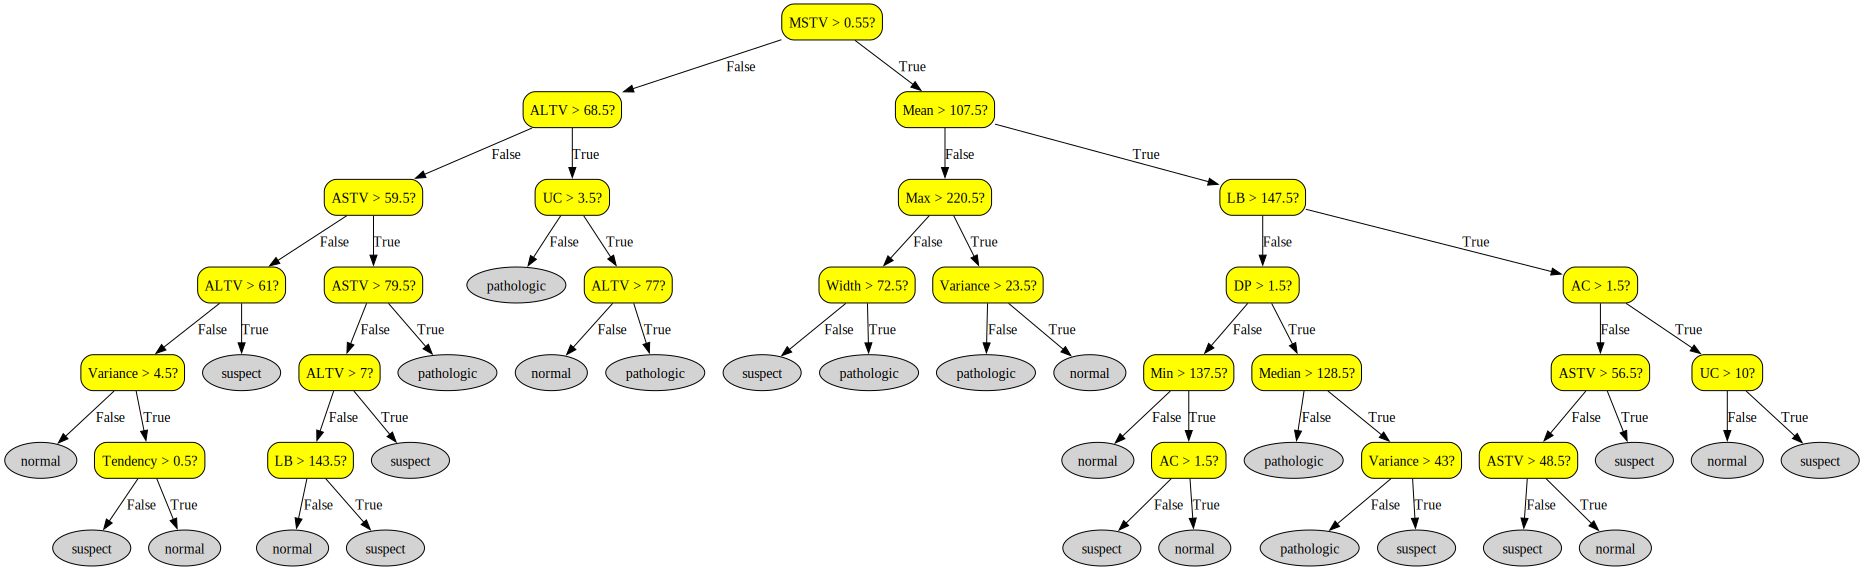

In [58]:
clf = TreeClassifier(criterion='gini',max_depth=max_score_tree_index+1)
clf.fit(Xtrain, Ytrain)
clf.draw_tree()

<p align="center"><font size="6">Task 3</font></p>

Gradient Boosting Regressor chosen for it's lowest mean square error.
Evaluation score: 0.265.

NOTE:
The MLP Regressor has the highest mean square error, which means it's unefficient here.

In [59]:
# If CTG.csv doesn't exist, download it.
if not os.path.exists('sberbank.csv'):
    !wget https://www.cse.chalmers.se/~richajo/dit866/data/sberbank.csv --no-check-certificate

# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 7 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

X.head()

,year,full_sq,life_sq,floor,num_room,kitch_sq,full_all
25252,2014,61,32.0,8.0,2.0,13.0,247469
9943,2013,43,20.0,10.0,1.0,8.0,68630
18040,2014,56,30.0,11.0,2.0,8.0,78507
8625,2013,54,32.0,10.0,2.0,9.0,26943
13495,2013,38,20.0,2.0,1.0,8.0,132349


In [60]:
scores = []

# Dummy 
m = DummyRegressor()
scores.append(-cross_validate(m, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean().round(3))

# Linear Regression
m = LinearRegression()
scores.append(-cross_validate(m, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean().round(3))

#  Ridge 
m = Ridge()
scores.append(-cross_validate(m, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean().round(3))

# Lasso 
m = Lasso()
scores.append(-cross_validate(m, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean().round(3))

# Decision Tree Regressor
m = DecisionTreeRegressor()
scores.append(-cross_validate(m, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean().round(3))

# Random Forest Regressor 
m = RandomForestRegressor()
scores.append(-cross_validate(m, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean().round(3))

# Gradient Boosting Regressor
gb_r = GradientBoostingRegressor()
scores.append(-cross_validate(gb_r, Xtrain, Ytrain, scoring='neg_mean_squared_error')["test_score"].mean().round(3))

# MLP Regressor
m = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(10, 100),
    alpha=0.001,
    random_state=20,
    early_stopping=True)
m.fit(Xtrain, Ytrain)
a = cross_validate(m, Xtrain, Ytrain, scoring='neg_mean_squared_error', verbose=1)['test_score']
scores.append(-a.mean().round(3))

In [61]:
# Classifiers results
# Print a table of all the scores and the names of the classfifiers
names = ['Dummy', 'Linear Regression', 'Ridge', 'Lasso', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor','MLP Regressor']
df = pd.DataFrame({'Classifier': names, 'Score': scores})
df['Score'] = df['Score'].round(3)
df =df.T
df.style \
    .format(precision=3, decimal=",") \
    .hide(axis=1) \
    .set_properties(**{"text-align": "center"}) \
    .highlight_min(subset=pd.IndexSlice[['Score'],:],axis=1,color='blue') \
    .set_table_styles([dict(selector='th', props=[('font-weight', 'bold')])])

Classifier,Dummy,Linear Regression,Ridge,Lasso,Decision Tree Regressor,Random Forest Regressor,Gradient Boosting Regressor,MLP Regressor
Score,"0,389","0,301","0,301","0,301","0,525","0,284","0,265","9,335"


In [62]:
from sklearn.metrics import mean_squared_error
  
gb_r.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, gb_r.predict(Xtest)).round(3)

0.271

<p align="center"><font size="6">Task 4</font></p>

Let's build a decision tree regressor.
For that we need to define :
- What a **leaf** of the tree is
- What a **branch** of the tree is

Using those last two, a **decision tree** can be defined.
Using a regressor, a **regressor** can then be built.

In [63]:
# 1 - Leaf
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False
        
    def to_str(self, indent, lines, names):
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        lines.append(' '*indent + val_str)

In [64]:
# 2 - Branch
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        
    def to_str(self, indent, lines, names):
        pad = ' '*indent
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lines.append(pad + f'{fname} <= {self.threshold:.3g}?')
        lines.append(pad + '  True =>')
        self.low_subtree.to_str(indent+4, lines, names)
        lines.append(pad + '  False =>')
        self.high_subtree.to_str(indent+4, lines, names)

In [65]:
# 3 - Decision Tree
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        
        _, best_feature, best_threshold = \
            max(self.best_split(X, Y, feature) 
                for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = \
            self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    def __str__(self):
        lines = []
        self.root.to_str(0, lines, self.names)
        return '\n'.join(lines)
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [66]:
def variance_reduction(n_low, low_sum, low_sum_squared, n_high, high_sum, high_sum_squared, var_Y, n):
    return var_Y - ((high_sum_squared / n) - (high_sum / n)**2) * (n_high / n) - ((low_sum_squared / n) - (low_sum / n)**2) * (n_low / n)


# 4 - Tree Regressor
class TreeRegressor(DecisionTree, RegressorMixin):

    # First of all, we need to implement an impurity treshold for the homogeneity check : if the variance is below this threshold, we consider the set homogeneous.
    def __init__(self, max_depth=10, criterion='var_reduction',impurity_treshold=1e-3):
        super().__init__(max_depth)
        self.criterion = criterion
        self.impurity_treshold = impurity_treshold
    
    # Then we use the mse criterion to compute the score of a split.    
    def fit(self, X, Y):
        if self.criterion == 'var_reduction':
            self.criterion_function = variance_reduction
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the average value
    def get_default_value(self, Y):
        return np.mean(Y)
    
    # Checks whether a set of output values is homogeneous. Here, it means checking if the variance is below the threshold.
    def is_homogeneous(self, Y):
        return  np.var(Y) < self.impurity_treshold
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)
        var_Y = np.var(Y)
        
        # Initialize variables for calculating variance efficiently
        low_sum = 0
        low_sum_squared = 0
        high_sum = np.sum(Y)
        high_sum_squared = np.sum(np.square(Y))
        
        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None
        
        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the sums
            low_sum += y_i
            low_sum_squared += np.square(y_i)
            high_sum -= y_i
            high_sum_squared -= np.square(y_i)
            
            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_sum,low_sum_squared, n-i-1, high_sum,high_sum_squared,var_Y,n)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point
        

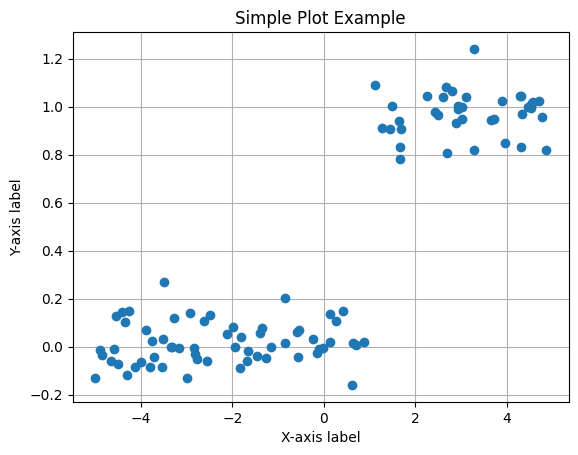

In [67]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

X,Y = make_some_data(100)
plt.plot(X,Y,'o')
# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Simple Plot Example')
plt.grid(True)
# Show the plot
plt.show()

[0.00342619 0.01230796 0.00612919 0.00834185 0.01160697]


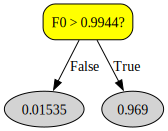

In [68]:
# Tree Regressor
m_tree= TreeRegressor(max_depth=1,criterion='var_reduction')
m_tree.fit(X, Y)
print(-cross_validate(m_tree, X, Y, scoring='neg_mean_squared_error', verbose=1)['test_score'])
m_tree.draw_tree()

# Works as expected !!
# A depth of 1 is enough to get a good approximation of the data

[0.398432   0.3705554  0.37807951 0.39057863 0.4047645 ]


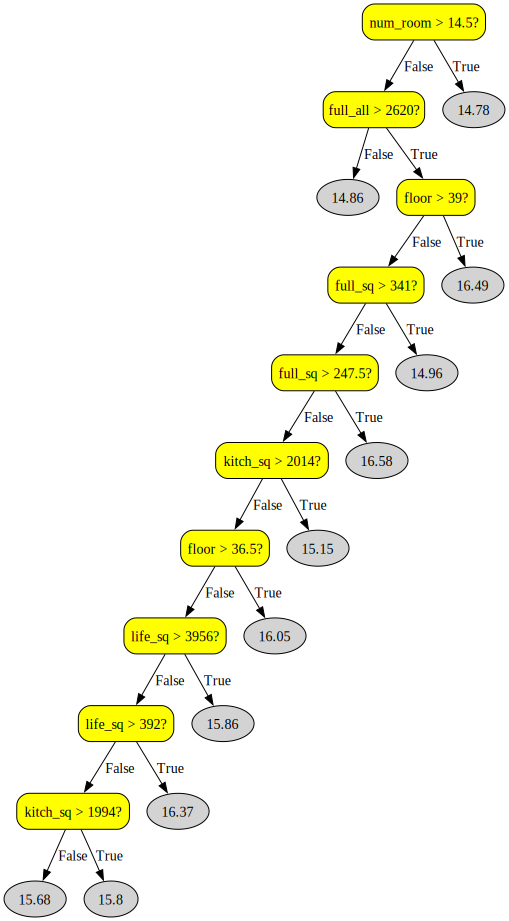

In [69]:
# Tree Regressor
m_tree= TreeRegressor(max_depth=10,criterion='var_reduction')
m_tree.fit(Xtrain, Ytrain)
print(-cross_validate(m_tree, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score'])
m_tree.draw_tree()

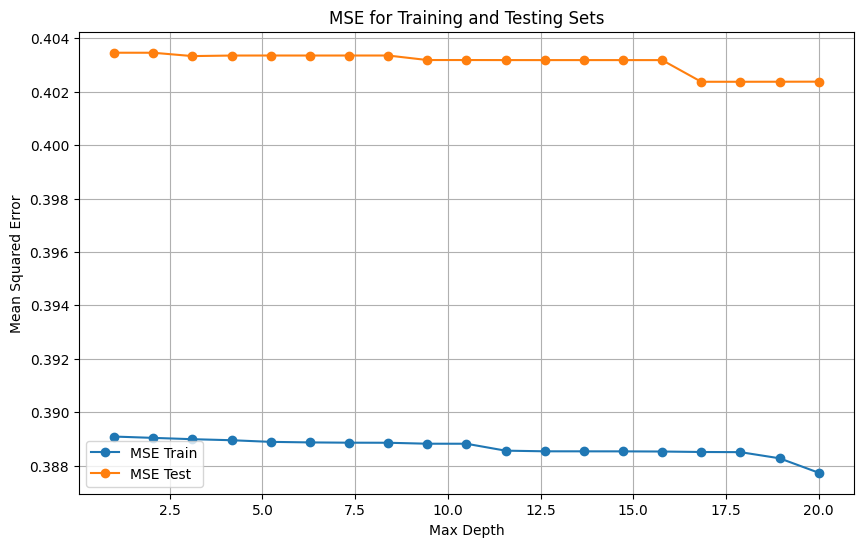

In [70]:
mse_train = []
mse_test = []
x = np.linspace(1, 20, 19)

for i in range(1,20):
    regr = TreeRegressor(max_depth=i)
    regr.fit(Xtrain, Ytrain)
    
    # Train set
    mse_train.append(mean_squared_error(Ytrain, regr.predict(Xtrain)))
    
    # Test set
    mse_test.append(mean_squared_error(Ytest, regr.predict(Xtest)))
    
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, mse_train, label='MSE Train', marker='o')
plt.plot(x, mse_test, label='MSE Test', marker='o')

plt.title('MSE for Training and Testing Sets')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()
    

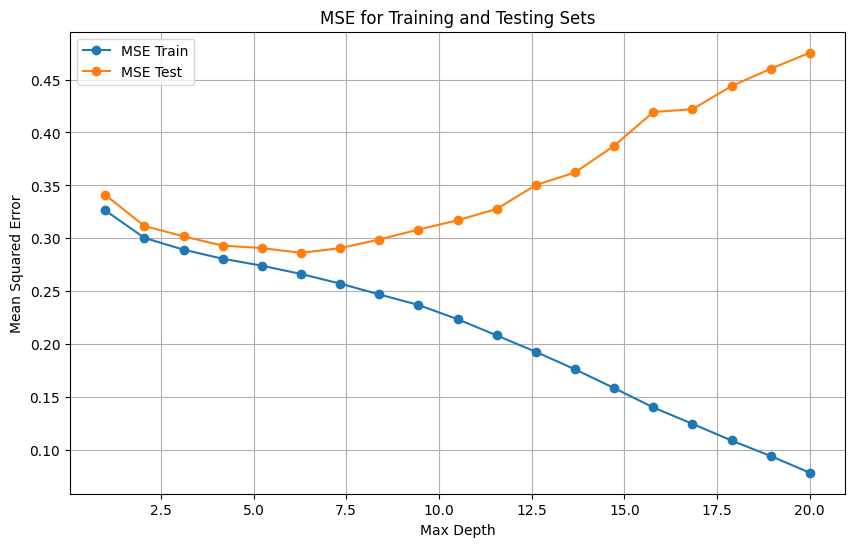

In [71]:
mse_train = []
mse_test = []
x = np.linspace(1, 20, 19)

for i in range(1,20):
    regr = DecisionTreeRegressor(max_depth=i)
    regr.fit(Xtrain, Ytrain)
    
    # Train set
    mse_train.append(mean_squared_error(Ytrain, regr.predict(Xtrain)))
    
    # Test set
    mse_test.append(mean_squared_error(Ytest, regr.predict(Xtest)))
    
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, mse_train, label='MSE Train', marker='o')
plt.plot(x, mse_test, label='MSE Test', marker='o')

plt.title('MSE for Training and Testing Sets')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()